## Tidy Data Project: A Look Into the 2008 Olympics

###Data Cleaning & Tidy Process

- When a data analyst or scientist says they are tidying a dataset, this means they are "structuring datasets to facilitate analysis" (Wickham, 1).
- We tidy data because in the real world, information and statistics are collected in messy and unorganized manners. According to Hadley Wickham in *Tidy Data* we must manipulate and change the way the data appears in order to ensure:
     1. Each variable forms a column.
     2. Each observation forms a row.
     3. Each type of observational unit forms a table.

In [42]:
# Import necessary libraries
print("\nStep 1: Import necessary libraries")
import pandas as pd  # For data manipulation
import seaborn as sns  # For dataset loading and visualizations
import matplotlib.pyplot as plt  # For plotting

# Import the untidy dataset
print("\nStep 2: Import the untidy dataset")
print("\nMake sure that you upload the csv properly. If you are using Google Colab, either connect it to your Google Drive or hit the Folder icon on the left sidebar, then the upload icon, and finally selecting your downloaded olympics_08_medalists.csv file.")
df_olympics = pd.read_csv("olympics_08_medalists.csv")

# Stats of dataset
print("\nStep 3: Look at the descriptive statistics for the original untidy dataset")
print(df_olympics.describe())

# Check for Missing Values
print("\nStep 4: Check the untidy dataset for missing values")
print(df_olympics.isnull().sum())

# Create a copy to preserve the original data.
print("\nStep 5: Create a copy of the untidy dataset")
df_clean = df_olympics.copy()

# Melt the DataFrame
# This step is crucial!
print("\nStep 6: Melt the DataFrame")
df_olympics_melted = pd.melt(df_clean, id_vars=['medalist_name'],
                             value_vars=['male_archery','female_archery', 'male_athletics','female_athletics','male_badminton','female_badminton',
                                         'male_baseball','male_basketball','female_basketball','male_boxing','male_canoeing and kayaking','female_canoeing and kayaking',
                                         'male_road bicycle racing','female_road bicycle racing','male_track cycling','female_track cycling','male_mountain biking',
                                         'female_mountain biking','male_bmx','female_bmx','male_diving','female_diving','female_equestrian sport','male_equestrian sport',
                                         'male_fencing','female_fencing','male_field hockey','female_field hockey','male_association football','female_association football',
                                         'male_artistic gymnastics','female_artistic gymnastics','female_rhythmic gymnastics','male_trampoline gymnastics','female_trampoline gymnastics',
                                         'male_handball','female_handball','male_judo','female_judo','male_modern pentathlon','female_modern pentathlon','male_rowing','female_rowing',
                                         'male_sailing','female_sailing','male_shooting sport','female_shooting sport','female_softball','male_swimming','female_swimming',
                                         'female_synchronized swimming','male_table tennis','female_table tennis','male_taekwondo','female_taekwondo','male_tennis','female_tennis',
                                         'male_triathlon','female_triathlon','male_beach volleyball','female_beach volleyball','male_volleyball','female_volleyball','male_water polo',
                                         'female_water polo','male_weightlifting','female_weightlifting','male_freestyle wrestling','female_freestyle wrestling','male_greco-roman wrestling'],
                             var_name='Olympic Event', value_name='Medal')
print("\nThis step is very important. Essentially it is organizing the data by shifting the variables spread across columns (value_vars) into a one column titled Olympic Event (var_name) and creating a new column titled Medal for the cell values.")

# Split the two variables in Olympic Event into two separate columns: Gender and Olympic Event
print("\nStep 7: Separate multiple variables stored in one column")
df_olympics_melted[['Gender', 'Olympic Event']] = df_olympics_melted['Olympic Event'].str.split('_', expand=True)
print("\nThis step is important for tidy data because as mentioned in <Tidy Data> variables must form a column and without this step, two variables (Gender and Sport) would be in one column. This separates the two variables so they each have their own column.")

# Dropping the rows with NA values in Medal column
print("\nStep 8: Remove null values")
df_olympics_clean = df_olympics_melted.dropna(subset = 'Medal')
print("\nThis step is incredibly important and shows up on the Pandas Cheat Sheet. Without this dropna function, the dataset would contain over 100,000 rows of unecessary data. In order to keep the rows which connect the athlete with their correct sport and medal, we must use the dropna(subset=) function.")

print("\nStep 9: Rename column")
df_olympics_final = df_olympics_clean.rename(columns = {'medalist_name':'Name'})

print("\nStep 10: Melted (Tidy) 2008 Olympics DataFrame:")
print(df_olympics_final)


Step 1: Import necessary libraries

Step 2: Import the untidy dataset

Make sure that you upload the csv properly. If you are using Google Colab, either connect it to your Google Drive or hit the Folder icon on the left sidebar, then the upload icon, and finally selecting your downloaded olympics_08_medalists.csv file.

Step 3: Look at the descriptive statistics for the original untidy dataset
       medalist_name male_archery female_archery male_athletics  \
count           1875           11              9             85   
unique          1875            3              3              3   
top      Živko Gocić       bronze         bronze         silver   
freq               1            4              4             31   

       female_athletics male_badminton female_badminton male_baseball  \
count                81             12               10            72   
unique                3              3                3             3   
top              silver         silver         

### Visualization

- Since I am dealing with multiple categorical variables I choose to primarily utilize grouped bar plots to best vizualize the relationship between the Gender of the Olympian and the Medal they won.
- The first two grouped bar plots (Plot 1 & Plot 2) use the same variables (Gender & Medal) but in different ways in order to show how different visualizations can be utilized for identical information.
- The third plot (Plot 3) was a way to check our previous code to verify that after cleaning the data, our medal values are evenly distributed. Plot 4 then checks to ensure that our cleaned dataset did not inaccurately categorize the gender of the medalists in cases of gender-specific events like softball.


Plot 1: Medals won by Male and Female Olympians in 2008 Games
Axes(0.125,0.11;0.775x0.77)


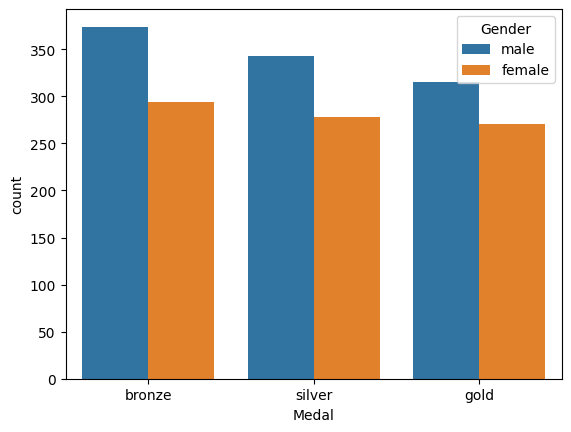

In [48]:
# Visualize data
print("\nPlot 1: Medals won by Male and Female Olympians in 2008 Games")
print(sns.countplot(x="Medal",
                    hue="Gender",
                    data=df_olympics_final))


Plot 2: Medals won by Male and Female Olympians in 2008 Games
Axes(0.125,0.11;0.775x0.77)


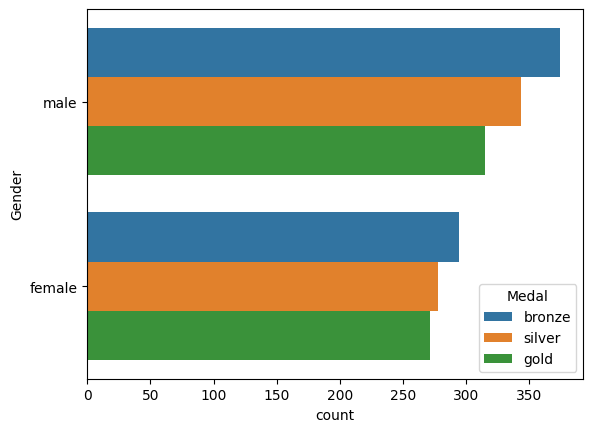

In [47]:
print("\nPlot 2: Medals won by Male and Female Olympians in 2008 Games")
print(sns.countplot(y="Gender",
                    hue="Medal",
                    data=df_olympics_final))


Plot 3: Medals Awarded Across All Olympic Events (2008)


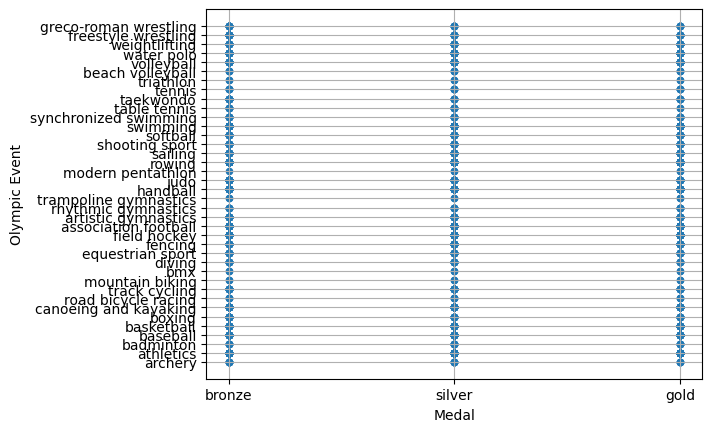


Plot 3 is potentially able to help us verify that in our dataset, each event in the 2008 Olympics awarded a bronze, silver, and gold medal.


In [43]:
print("\nPlot 3: Medals Awarded Across All Olympic Events (2008)")
df_olympics_final.plot.scatter('Medal', # x-axis
                               'Olympic Event', # y-axis
                               grid=True, # Add a grid in the background
                               )
plt.show()
print("\nPlot 3 is potentially able to help us verify that in our dataset, each event in the 2008 Olympics awarded a bronze, silver, and gold medal.")


Plot 4: Medalists' Gender by Olympic Event (2008)


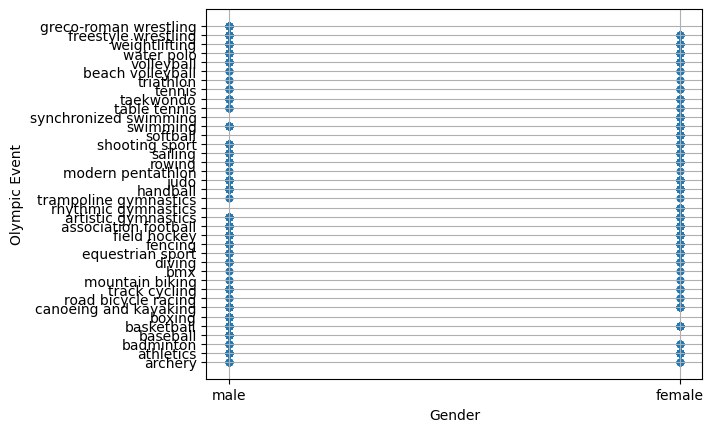

In [38]:
print("\nPlot 4: Medalists' Gender by Olympic Event (2008)")
df_olympics_final.plot.scatter('Gender', # x-axis
                               'Olympic Event', # y-axis
                               grid=True, # Add a grid in the background
                               )
plt.show()

### Pivot-Tables

In [45]:
# Pivot the DataFrame:
df_olympics_pivot = pd.pivot_table(df_olympics_final,
                                   values='Olympic Event', # Column values that will fill the new dataframe
                                   index='Name', # Column used as row labels
                                   columns='Gender', # Column values that will become the new column headers
                                   aggfunc='sum') # Usally used when multiple values exist for an index/column combination
print("\nPivot Table 1:")
print(df_olympics_pivot)


Pivot Table 1:
Gender                    female                  male
Name                                                  
Aaron Armstrong              NaN             athletics
Aaron Peirsol                NaN              swimming
Abdullo Tangriev             NaN                  judo
Abeer Abdelrahman  weightlifting                   NaN
Abhinav                      NaN        shooting sport
...                          ...                   ...
Éver Banega                  NaN  association football
Ólafur Stefánsson            NaN              handball
Óscar Brayson                NaN                  judo
Łukasz Pawłowski             NaN                rowing
Živko Gocić                  NaN            water polo

[1875 rows x 2 columns]


In [46]:
df_olympics_pivot_2 = pd.pivot_table(df_olympics_final,
                                     values='Olympic Event',
                                     index='Name',
                                     columns='Medal',
                                     aggfunc='sum')
print("\nPivot Table 2:")
print(df_olympics_pivot_2)


Pivot Table 2:
Medal                     bronze                  gold    silver
Name                                                            
Aaron Armstrong              NaN             athletics       NaN
Aaron Peirsol                NaN              swimming       NaN
Abdullo Tangriev             NaN                   NaN      judo
Abeer Abdelrahman  weightlifting                   NaN       NaN
Abhinav                      NaN        shooting sport       NaN
...                          ...                   ...       ...
Éver Banega                  NaN  association football       NaN
Ólafur Stefánsson            NaN                   NaN  handball
Óscar Brayson               judo                   NaN       NaN
Łukasz Pawłowski             NaN                   NaN    rowing
Živko Gocić           water polo                   NaN       NaN

[1875 rows x 3 columns]
